In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px

%matplotlib inline

In [2]:
#importing and reorganizing data
clustered = pd.read_csv('./datasets/clustered_fires.csv')
all_tweets = pd.read_csv('./datasets/stacked_sentiment_again.csv')

clustered['timestamp'] = pd.to_datetime(clustered['timestamp'])
clustered.set_index('timestamp', inplace = True)

all_tweets['timestamp'] = pd.to_datetime(all_tweets['timestamp'])
all_tweets.set_index('timestamp', inplace=True)

clustered.sort_index(inplace=True)
all_tweets.sort_index(inplace=True)

In [ ]:
clustered.resample('D').mean()

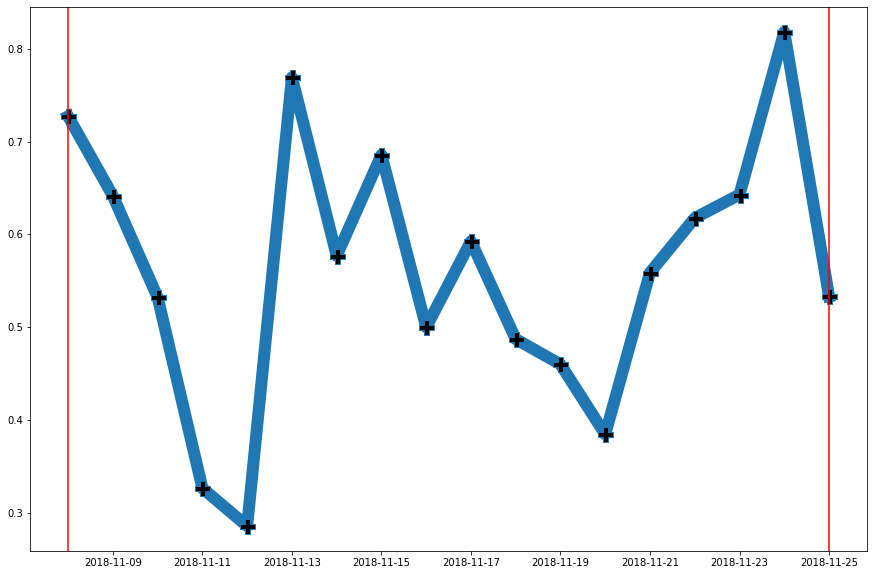

In [115]:
#Sentiment over time
# Vertical lines are the dates the fire began and ended
plt.figure(figsize=(15,10))
plt.plot(clustered['2018-11-08':].resample('D')['sent'].mean(), lw=12, marker='P', markersize=15, mfc='k')
plt.axvline(pd.to_datetime('2018-11-08'), color='red')
plt.axvline(pd.to_datetime('2018-11-25'), color='red')

In [191]:
# pd.DataFrame(clustered['2018-11-08':].resample('D')['sent'].mean()).reset_index()

In [14]:
# Plotly Sentiment over time
fig = px.line(pd.DataFrame(clustered['2018-11-08':].resample('D')['sent'].mean()).reset_index(),
             x = 'timestamp',
             y = 'sent',
             title = 'Average Sentiment by Day during the 2018 Camp Fire',
             labels={
                 'timestamp' : 'Date',
                 'sent' : 'Sentiment'
             }).update(layout=dict(title=dict(x=0.5)))
fig.update_yaxes(range=[0,1])
fig.update_traces(line_color='darkred')

fig.show()

(array([736999., 737003., 737007., 737011., 737015., 737019., 737023.]),
 <a list of 7 Text major ticklabel objects>)

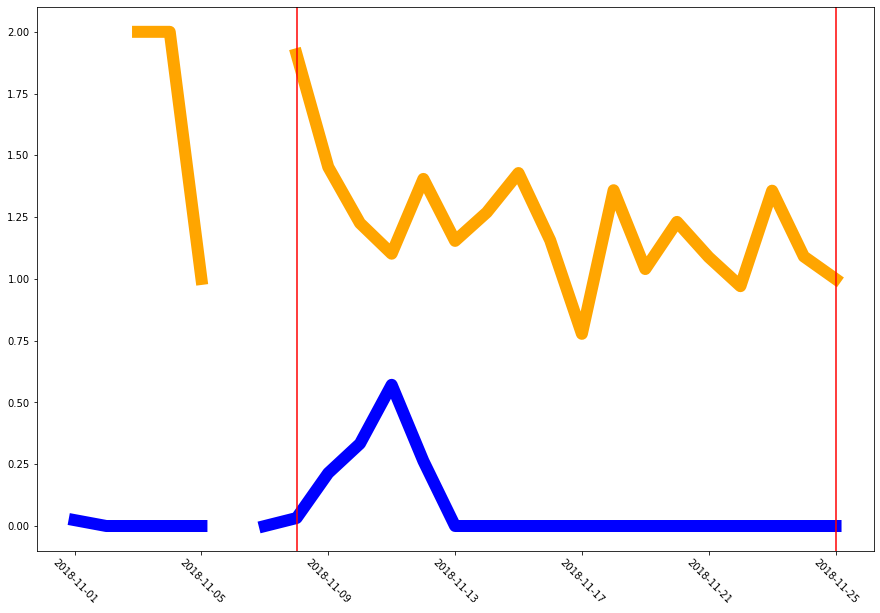

In [7]:
#Key score over time.  fire v not fire
during_fire = all_tweets #['2018-11-08':]
plt.figure(figsize=(15,10))
plt.plot(during_fire[during_fire['is-fire-related'] == 0].resample('D')['key_score'].mean(), color='blue', lw=12)
plt.plot(during_fire[during_fire['is-fire-related'] == 1].resample('D')['key_score'].mean(), color='orange', lw=12)
plt.axvline(pd.to_datetime('2018-11-08'), color='red')
plt.axvline(pd.to_datetime('2018-11-25'), color='red')
plt.xticks(rotation = -45)

In [152]:
is_fire.shape

(25, 1)

In [8]:
# Making temp dataframe to make it easier to plot
no_fire = pd.DataFrame(during_fire[during_fire['is-fire-related'] == 0].resample('D')['key_score'].mean()).rename(columns={'key_score' : 'Not Fire Related'})
is_fire = pd.DataFrame(during_fire[during_fire['is-fire-related'] == 1].resample('D')['key_score'].mean()).rename(columns={'key_score' :  'Fire Related'})

avg_key_day = pd.merge(no_fire, is_fire, left_index=True, right_index=True)                                                                                                      


In [9]:
# Key score by day via plotly
# Vertical lines are the dates the fire began and ended
fig = go.Figure()
fig.add_trace(go.Scatter(x=avg_key_day.index, y=avg_key_day['Not Fire Related'], 
                         name='Not Fire Related', line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=avg_key_day.index, y=avg_key_day['Fire Related'],
                        name='Fire Related', line_color='darkred'))
fig.update_layout(title_text='Average Key Score by Day')
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_layout(xaxis=dict(title = 'Date'))
fig.update_layout(yaxis=dict(title = 'Key Score'))
fig.add_shape(dict(type='line',
                  x0='2018-11-08', x1='2018-11-08',
                  y0=0, y1=2, line=dict(color='Black')))
fig.add_shape(dict(type='line',
                  x0='2018-11-25', x1='2018-11-25',
                  y0=0, y1=2, line=dict(color='Black')))
fig.show()

In [4]:
#Sentiment by key score
data = pd.DataFrame(clustered.groupby('key_score')['sent'].mean())
fig = px.bar(data, x=data.index, y='sent',
             title = 'Average Sentiment by Key Score',
             labels={
                 'x' : 'Key Score',
                 'sent' : 'Sentiment'
             }).update(layout=dict(title=dict(x=0.5)))
fig.update_yaxes(range=[0,1])
fig.update_traces(marker_color='darkred')
fig.show()

<BarContainer object of 7 artists>

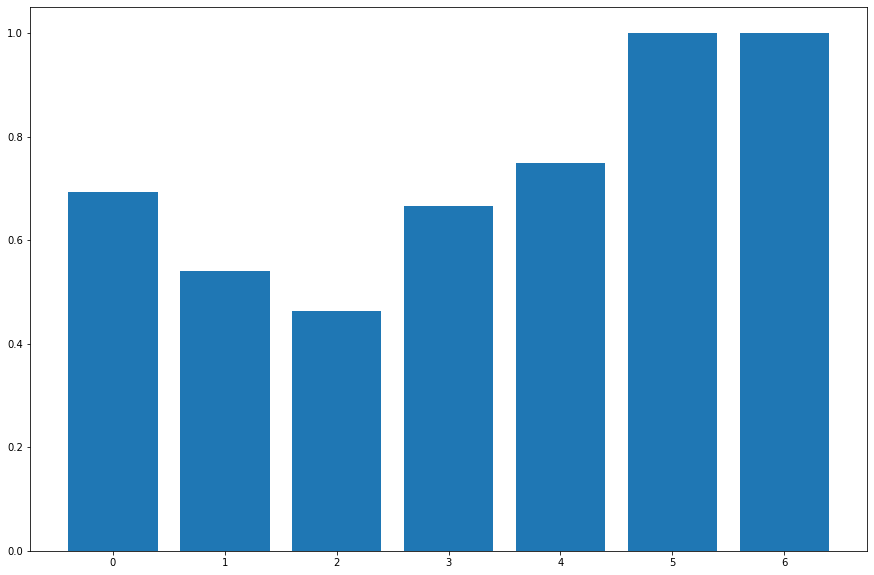

In [33]:
# sentiment by keyscore
plt.figure(figsize=(15,10))
plt.bar(clustered['key_score'].unique(), clustered.groupby('key_score')['sent'].mean())

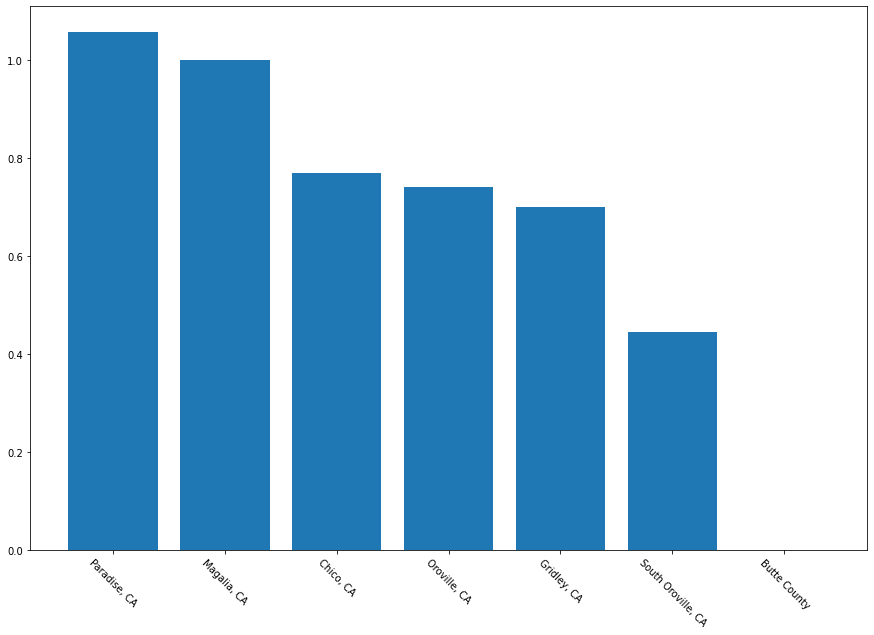

In [83]:
# keyscore by location during the fire
plt.figure(figsize=(15,10))
plt.bar(during_fire[during_fire['from_locations'].isin(multipletweets)].groupby('from_locations')['key_score'].mean().sort_values(ascending=False).index,
        during_fire[during_fire['from_locations'].isin(multipletweets)].groupby('from_locations')['key_score'].mean().sort_values(ascending=False))
plt.xticks(rotation=-45);

In [12]:
# keyscore by location during the fire
data = pd.DataFrame(during_fire[during_fire['from_locations'].isin(multipletweets)].groupby('from_locations')['key_score'].mean())
data.sort_values('key_score', ascending=False, inplace=True)
fig = px.bar(data, x=data.index, y='key_score',
             title = 'Average Key Score by Location during the Camp Fire',
             labels={
                 'x' : 'Location',
                 'key_score' : 'Key Score'
             }).update(layout=dict(title=dict(x=0.5)))
fig.update_traces(marker_color='darkred')
fig.show()

In [11]:
# Filting out some locations with very few tweets
# during_fire[during_fire.groupby['from_locations'].count>2]
from_locs = during_fire['from_locations'].value_counts()
multipletweets = from_locs[from_locs>=9].index
multipletweets

Index(['Chico, CA', 'Paradise, CA', 'Oroville, CA', 'Butte County',
       'Magalia, CA', 'Gridley, CA', 'South Oroville, CA', 'Sacramento, CA'],
      dtype='object')